In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in train_df['Name']]
train_df['Title'] = pd.Series(dataset_title)
train_df['Title'] = train_df['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

dataset_title = [i.split(',')[1].split('.')[0].strip() for i in test_df['Name']]
test_df['Title'] = pd.Series(dataset_title)
test_df['Title'] = test_df['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

In [5]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] +1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df

In [6]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1


In [7]:
def family(x):
    if x < 2:
        return 'Single'
    elif x == 2:
        return 'Couple'
    elif x <= 4:
        return 'InterM'
    else:
        return 'Large'

train_df['FamilySize'] = train_df['FamilySize'].apply(family)
test_df['FamilySize'] = test_df['FamilySize'].apply(family)

In [8]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

In [9]:
train_df['Cabin'] = train_df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
test_df['Cabin'] = test_df['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

In [10]:
train_df = train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1)
test_passengers = test_df['PassengerId']
test_df = test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1)

In [11]:
train_df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,M,S,Mr,Couple
1,1,1,female,38.0,71.2833,C,C,Mrs,Couple
2,1,3,female,26.0,7.9250,M,S,Miss,Single
3,1,1,female,35.0,53.1000,C,S,Mrs,Couple
4,0,3,male,35.0,8.0500,M,S,Mr,Single
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,M,S,Rare,Single
887,1,1,female,19.0,30.0000,B,S,Miss,Single
888,0,3,female,28.0,23.4500,M,S,Miss,InterM
889,1,1,male,26.0,30.0000,C,C,Mr,Single


In [12]:
test_df

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,34.5,7.8292,M,Q,Mr,Single
1,3,female,47.0,7.0000,M,S,Mrs,Couple
2,2,male,62.0,9.6875,M,Q,Mr,Single
3,3,male,27.0,8.6625,M,S,Mr,Single
4,3,female,22.0,12.2875,M,S,Mrs,InterM
...,...,...,...,...,...,...,...,...
413,3,male,27.0,8.0500,M,S,Mr,Single
414,1,female,39.0,108.9000,C,C,Rare,Single
415,3,male,38.5,7.2500,M,S,Mr,Single
416,3,male,27.0,8.0500,M,S,Mr,Single


In [13]:
train_df.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
Fare          float64
Cabin          object
Embarked       object
Title          object
FamilySize     object
dtype: object

In [15]:
cat_cols = ['Pclass','Sex','Cabin','Embarked','Title','FamilySize']
for cat in cat_cols:
    train_df[cat] = train_df[cat].astype('category')
    test_df[cat] = test_df[cat].astype('category')

In [16]:
train_df.dtypes

Survived         int64
Pclass        category
Sex           category
Age            float64
Fare           float64
Cabin         category
Embarked      category
Title         category
FamilySize    category
dtype: object

In [20]:
train_df['Title']= train_df['Title'].cat.codes


In [22]:
train_df['Title']

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Title, Length: 891, dtype: int8

In [23]:
train_df['Pclass']= train_df['Pclass'].cat.codes
train_df['Sex']= train_df['Sex'].cat.codes
train_df['Cabin'] = train_df['Cabin'].cat.codes
train_df['Embarked']= train_df['Embarked'].cat.codes
train_df['FamilySize']= train_df['FamilySize'].cat.codes

test_df['Pclass']= test_df['Pclass'].cat.codes
test_df['Sex']= test_df['Sex'].cat.codes
test_df['Cabin'] = test_df['Cabin'].cat.codes
test_df['Embarked']= test_df['Embarked'].cat.codes
test_df['FamilySize']= test_df['FamilySize'].cat.codes

In [24]:
test_df['Title'] = test_df['Title'].cat.codes

In [28]:
test_df

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,2,1,34.5,7.8292,7,1,2,3
1,2,0,47.0,7.0000,7,2,3,0
2,1,1,62.0,9.6875,7,1,2,3
3,2,1,27.0,8.6625,7,2,2,3
4,2,0,22.0,12.2875,7,2,3,1
...,...,...,...,...,...,...,...,...
413,2,1,27.0,8.0500,7,2,2,3
414,0,0,39.0,108.9000,2,0,4,3
415,2,1,38.5,7.2500,7,2,2,3
416,2,1,27.0,8.0500,7,2,2,3


In [29]:
x_train = train_df.iloc[:,1:9].values
y = train_df.iloc[:,0].values
x_test = test_df.values

In [48]:
x_test = test_df.values

In [50]:
x_test[0]

array([ 2.    ,  1.    , 34.5   ,  7.8292,  7.    ,  1.    ,  2.    ,
        3.    ])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.1)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [46]:
X_test.dtype

torch.float32

In [74]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8,350)
        self.fc2 = nn.Linear(350, 100)
        self.fc3 = nn.Linear(100,2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.sigmoid(x)
        
        return x

In [75]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [76]:
epochs=100
losses=[]
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 0.63987279
epoch: 11  loss: 0.60051024
epoch: 21  loss: 0.59825104
epoch: 31  loss: 0.59604055
epoch: 41  loss: 0.59281760
epoch: 51  loss: 0.58437485
epoch: 61  loss: 0.58430368
epoch: 71  loss: 0.58164483
epoch: 81  loss: 0.57311171
epoch: 91  loss: 0.56256020


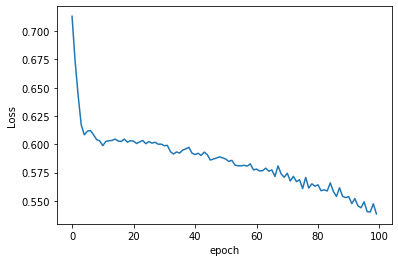

In [57]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [77]:
correct = 0
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val.argmax().item()):38}  {y_test[i]}')
        predictions.append([test_passengers[i],y_val.argmax().item()])
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. 0                                       0
 2. 0                                       0
 3. 1                                       1
 4. 1                                       1
 5. 0                                       0
 6. 1                                       0
 7. 1                                       1
 8. 1                                       1
 9. 0                                       1
10. 0                                       0
11. 1                                       0
12. 1                                       1
13. 0                                       1
14. 1                                       1
15. 1                                       1
16. 1                                       0
17. 1                                       1
18. 0                                       0
19. 0                                       1
20. 1                                       1
21. 0                                       0
22. 0                             

In [51]:
x_test = torch.FloatTensor(x_test)

In [52]:
x_test[0].dtype

torch.float32

In [78]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(x_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val.argmax().item()):38}')
        predictions.append([test_passengers[i],y_val.argmax().item()])
    

 1. 0                                     
 2. 0                                     
 3. 0                                     
 4. 0                                     
 5. 0                                     
 6. 0                                     
 7. 0                                     
 8. 0                                     
 9. 1                                     
10. 0                                     
11. 0                                     
12. 0                                     
13. 1                                     
14. 0                                     
15. 1                                     
16. 1                                     
17. 0                                     
18. 0                                     
19. 0                                     
20. 0                                     
21. 1                                     
22. 0                                     
23. 0                                     
24. 1      

405. 1                                     
406. 0                                     
407. 0                                     
408. 1                                     
409. 0                                     
410. 1                                     
411. 0                                     
412. 1                                     
413. 0                                     
414. 0                                     
415. 1                                     
416. 0                                     
417. 0                                     
418. 0                                     


In [84]:
import csv

submission = [['PassengerId', 'Survived']]
for i in range(len(predictions)):
    submission.append(predictions[i])

In [85]:
submission

[['PassengerId', 'Survived'],
 [892, 0],
 [893, 0],
 [894, 0],
 [895, 0],
 [896, 0],
 [897, 0],
 [898, 0],
 [899, 0],
 [900, 1],
 [901, 0],
 [902, 0],
 [903, 0],
 [904, 1],
 [905, 0],
 [906, 1],
 [907, 1],
 [908, 0],
 [909, 0],
 [910, 0],
 [911, 0],
 [912, 1],
 [913, 0],
 [914, 0],
 [915, 1],
 [916, 1],
 [917, 0],
 [918, 1],
 [919, 0],
 [920, 1],
 [921, 0],
 [922, 0],
 [923, 1],
 [924, 0],
 [925, 0],
 [926, 1],
 [927, 0],
 [928, 0],
 [929, 0],
 [930, 0],
 [931, 1],
 [932, 0],
 [933, 0],
 [934, 0],
 [935, 0],
 [936, 1],
 [937, 0],
 [938, 1],
 [939, 0],
 [940, 1],
 [941, 0],
 [942, 1],
 [943, 0],
 [944, 1],
 [945, 1],
 [946, 0],
 [947, 1],
 [948, 0],
 [949, 0],
 [950, 0],
 [951, 1],
 [952, 0],
 [953, 0],
 [954, 0],
 [955, 0],
 [956, 1],
 [957, 0],
 [958, 1],
 [959, 0],
 [960, 0],
 [961, 1],
 [962, 0],
 [963, 0],
 [964, 0],
 [965, 1],
 [966, 1],
 [967, 1],
 [968, 0],
 [969, 1],
 [970, 0],
 [971, 0],
 [972, 1],
 [973, 1],
 [974, 0],
 [975, 0],
 [976, 0],
 [977, 0],
 [978, 0],
 [979, 0],
 [

In [86]:
with open('submission.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(submission)
    
print('Writing Complete!')

Writing Complete!


In [89]:
trial = pd.read_csv('gender_submission.csv')

In [90]:
trial.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
